In [20]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Import rasterio
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pathlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image


In [17]:
# import rasterio
# import numpy as np
# from shapely.geometry import Point
# import geopandas as gpd

# def process_ndvi_raster(raster_file, step_size=10):
#     with rasterio.open(raster_file) as src:
#         raster_data = src.read(1)
#         transform = src.transform
#         rows, cols = raster_data.shape

#     points = []
#     ndvi_values = []

#     for row in range(0, rows, step_size):
#         for col in range(0, cols, step_size):
#             value = raster_data[row, col]
#             if not np.isnan(value) and value > 0:
#                 x, y = rasterio.transform.xy(transform, row, col)
#                 points.append(Point(x, y))
#                 ndvi_values.append(value)

#     return gpd.GeoDataFrame({
#         'NDVI': ndvi_values,
#         'geometry': points
#     })

# if __name__ == "__main__":
#     raster_file =  'vegetation_indices-20250210T155902Z-001/vegetation_indices/NDVI_2021.tif'
#     gdf = process_ndvi_raster(raster_file)

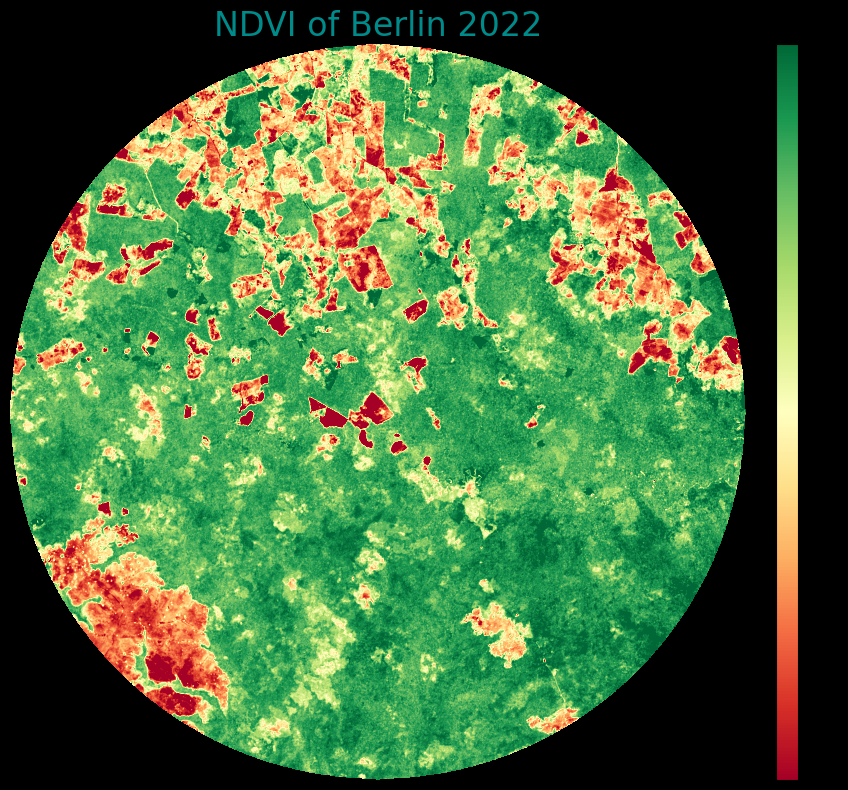

In [25]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_ndvi_raster(raster_file):
   with rasterio.open(raster_file) as src:
       raster_data = src.read(1)
       
   fig, ax = plt.subplots(figsize=(14, 8))
   
   # Handling invalid values
   valid_mask = ~(np.isnan(raster_data) | np.isinf(raster_data))
   valid_data = raster_data[valid_mask]
   vmin, vmax = np.percentile(valid_data, [2, 98])
   
   im = ax.imshow(raster_data, cmap='RdYlGn', vmin=vmin, vmax=vmax)
   
   divider = make_axes_locatable(ax)
   cax = divider.append_axes("right", size="3%", pad=0.3)
   plt.colorbar(im, cax=cax)
   
   fig.patch.set_facecolor('black')
   ax.set_facecolor('black')
   ax.set_title('NDVI of Berlin 2022', fontsize=24, color='darkcyan')
   ax.axis('off')
   
   plt.tight_layout()
   return fig

if __name__ == "__main__":
   raster_file = 'vegetation_indices-20250210T155902Z-001/vegetation_indices/NDVI_2022.tif'
   fig = plot_ndvi_raster(raster_file)
   plt.show()

#### NDVI

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from PIL import Image

def plot_ndvi_raster(raster_file, output_folder):
    with rasterio.open(raster_file) as src:
        raster_data = src.read(1)
        
        # Clean data by removing invalid values
        valid_mask = ~(np.isnan(raster_data) | np.isinf(raster_data))
        valid_data = raster_data[valid_mask]
        
        if len(valid_data) == 0:
            print(f"Warning: No valid data found in {raster_file}")
            return None
            
        vmin, vmax = np.percentile(valid_data, [2, 98])
        
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Use linear normalization instead of LogNorm
    im = ax.imshow(raster_data, cmap='RdYlGn', vmin=vmin, vmax=vmax)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.3)
    plt.colorbar(im, cax=cax, label='NDVI')
    
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    year = os.path.basename(raster_file).split('_')[1].split('.')[0]
    ax.set_title(f'NDVI {year}', fontsize=24, color='darkcyan')
    ax.axis('off')
    
    plt.tight_layout()
    
    output_file = os.path.join(output_folder, f'NDVI_{year}.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()
    
    return output_file

def create_gif(image_files, output_folder):
    images = [Image.open(f) for f in sorted(image_files) if f is not None]
    if images:
        gif_path = os.path.join(output_folder, 'NDVI_timeseries.gif')
        images[0].save(gif_path, save_all=True, append_images=images[1:], duration=1000, loop=0)
        return gif_path
    return None

def main():
    input_folder = input("Enter folder path containing NDVI files: ")
    output_folder = input("Enter output folder path: ")
    os.makedirs(output_folder, exist_ok=True)
    
    processed_images = []
    for filename in sorted(os.listdir(input_folder)):
        if filename.startswith('NDVI') and filename.endswith('.tif'):
            raster_file = os.path.join(input_folder, filename)
            print(f"Processing {filename}...")
            plot_file = plot_ndvi_raster(raster_file, output_folder)
            if plot_file:
                processed_images.append(plot_file)
    
    if len(processed_images) > 1:
        gif_path = create_gif(processed_images, output_folder)
        if gif_path:
            print(f"GIF created: {gif_path}")

if __name__ == "__main__":
    main()

Enter folder path containing NDVI files:  C:\RMTPROJECTS\gras\vegetation_indices\vegetation_indices
Enter output folder path:  C:\RMTPROJECTS\gras\gif\gif_updated


Processing NDVI_2016.tif...
Processing NDVI_2017.tif...
Processing NDVI_2018.tif...
Processing NDVI_2019.tif...
Processing NDVI_2020.tif...
Processing NDVI_2021.tif...
Processing NDVI_2022.tif...
Processing NDVI_2023.tif...
Processing NDVI_2024.tif...
Processing NDVI_2025.tif...
GIF created: C:\RMTPROJECTS\gras\gif\gif_updated\NDVI_timeseries.gif


#### EVI


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from PIL import Image

def plot_evi_raster(raster_file, output_folder):
    with rasterio.open(raster_file) as src:
        raster_data = src.read(1)
        
        # Clean data by removing invalid values
        valid_mask = ~(np.isnan(raster_data) | np.isinf(raster_data))
        valid_data = raster_data[valid_mask]
        
        if len(valid_data) == 0:
            print(f"Warning: No valid data found in {raster_file}")
            return None
            
        vmin, vmax = np.percentile(valid_data, [2, 98])
        
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Use linear normalization 
    im = ax.imshow(raster_data, cmap='YlGn', vmin=vmin, vmax=vmax)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.3)
    plt.colorbar(im, cax=cax, label='EVI')
    
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    year = os.path.basename(raster_file).split('_')[1].split('.')[0]
    ax.set_title(f'EVI {year}', fontsize=24, color='darkcyan')
    ax.axis('off')
    
    plt.tight_layout()
    
    output_file = os.path.join(output_folder, f'EVI_{year}.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()
    
    return output_file

def create_gif(image_files, output_folder):
    images = [Image.open(f) for f in sorted(image_files) if f is not None]
    if images:
        gif_path = os.path.join(output_folder, 'EVI_timeseries.gif')
        images[0].save(gif_path, save_all=True, append_images=images[1:], duration=1000, loop=0)
        return gif_path
    return None

def main():
    input_folder = input("Enter folder path containing EVI files: ")
    output_folder = input("Enter output folder path: ")
    os.makedirs(output_folder, exist_ok=True)
    
    processed_images = []
    for filename in sorted(os.listdir(input_folder)):
        if filename.startswith('EVI') and filename.endswith('.tif'):
            raster_file = os.path.join(input_folder, filename)
            print(f"Processing {filename}...")
            plot_file = plot_evi_raster(raster_file, output_folder)
            if plot_file:
                processed_images.append(plot_file)
    
    if len(processed_images) > 1:
        gif_path = create_gif(processed_images, output_folder)
        if gif_path:
            print(f"GIF created: {gif_path}")

if __name__ == "__main__":
    main()

Enter folder path containing EVI files:  C:\RMTPROJECTS\gras\vegetation_indices\vegetation_indices
Enter output folder path:  C:\RMTPROJECTS\gras\gif\gif_updated


Processing EVI_2016.tif...
Processing EVI_2017.tif...
Processing EVI_2018.tif...
Processing EVI_2019.tif...
Processing EVI_2020.tif...
Processing EVI_2021.tif...
Processing EVI_2022.tif...
Processing EVI_2023.tif...
Processing EVI_2024.tif...
Processing EVI_2025.tif...
GIF created: C:\RMTPROJECTS\gras\gif\gif_updated\EVI_timeseries.gif
